In [1]:
print("all ok")

all ok


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import numpy as np

In [4]:
x= 6 * np.random.rand(200,1) - 3
y= 0.8 * x**2 + 0.9 *x + np.random.rand(200,1)

In [7]:
x.shape

(200, 1)

In [8]:
y.shape

(200, 1)

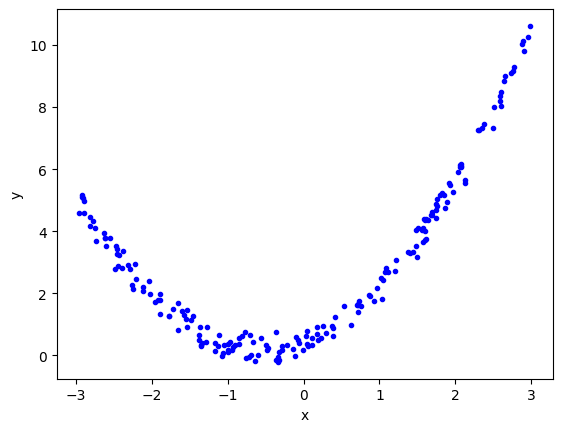

In [9]:
plt.plot(x,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [11]:
ler=LinearRegression()

ler.fit(x_train,y_train)

y_pred=ler.predict(x_test)

print("R2 score=",r2_score(y_test,y_pred))

R2 score= 0.34598123639302314


In [12]:
print("coef--\n",ler.coef_)

print("intercept--\n",ler.intercept_)

coef--
 [[0.76467358]]
intercept--
 [2.75955966]


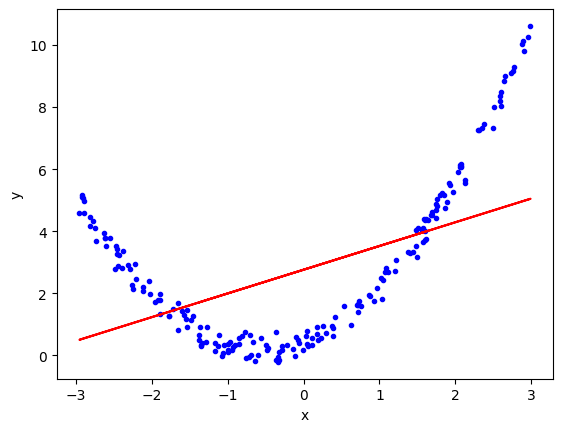

In [13]:
plt.plot(x,y,'b.')
plt.plot(x,ler.predict(x),'red')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [17]:
poly=PolynomialFeatures(degree=2,include_bias=True)

x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [18]:
print(x_train[0])
print(x_train_poly[0])

[1.44754681]
[1.         1.44754681 2.09539177]


In [19]:
lr=LinearRegression()
lr.fit(x_train_poly,y_train)

y_pred=lr.predict(x_test_poly)

print("R2 score=",r2_score(y_test,y_pred))

R2 score= 0.9933648918150038


In [20]:
print("coef--\n",lr.coef_)

print("intercept--\n",lr.intercept_)

coef--
 [[0.         0.92358936 0.82968981]]
intercept--
 [0.47688915]


In [21]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

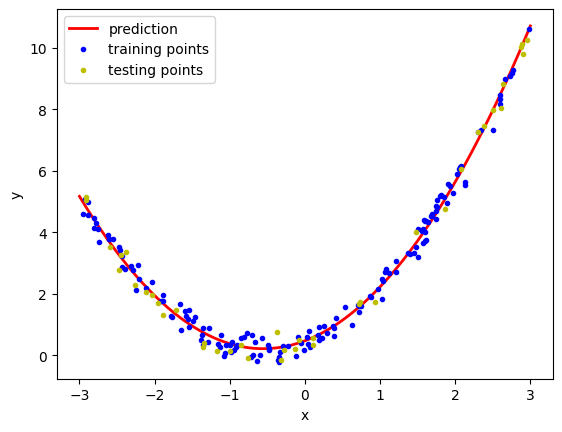

In [23]:

plt.plot(x_new,y_new,'r-',linewidth=2,label='prediction')
plt.plot(x_train,y_train,'b.',label='training points')
plt.plot(x_test,y_test,'y.',label='testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [26]:
def polynomial_features(degree : int):
    x_new=np.linspace(-3,3,100).reshape(100,1)
    poly=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()

    polynomial_reg=Pipeline([
        ("Poly_features",poly),
        ("scaler" , std_scaler),
        ('lin_reg' , lin_reg)
    ])

    polynomial_reg.fit(x,y)
    y_new=polynomial_reg.predict(x_new)

    plt.plot(x_new,y_new, 'r',label="Degree "+ str(degree),linewidth=2)
    plt.plot(x_train,y_train,'b.',label='training points')
    plt.plot(x_test,y_test,'y.',label='testing points')
    plt.xlabel("x") 
    plt.ylabel("y")
    plt.legend()
    plt.show()


    

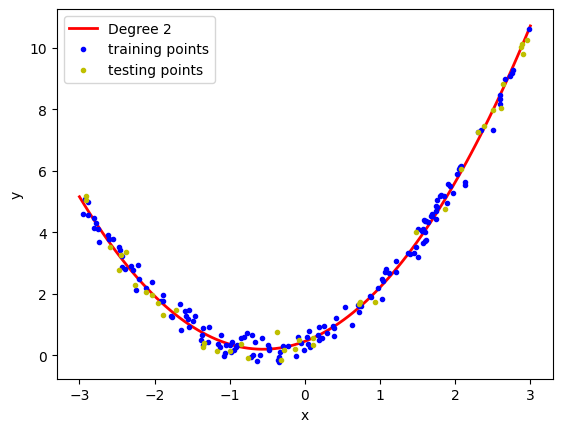

In [30]:
polynomial_features(2)

In [32]:
x= 7 * np.random.rand(100,1)- 2.8
y= 7 * np.random.rand(100,1)- 2.8

In [33]:
z= x**2 + y**2 + 0.2 *x + 0.2 * y + 0.1*x*y +2 + np.random.rand(100,1)

In [34]:
z.ravel()

array([ 5.18025524, 10.90284644,  5.43468296,  8.76752858,  9.91290913,
        9.39098009,  4.94407282, 20.5374832 ,  7.86946803, 16.11879326,
       17.7396461 , 12.94810278,  7.12171171,  4.13620466,  5.73738971,
       18.99347647,  7.04663103,  8.49601753, 17.26367762, 15.87360442,
       15.79932843,  8.52959334, 21.32461125, 10.28207905,  6.23262471,
       19.11368336, 11.40451703, 17.59665555, 20.26676014,  7.63885853,
        5.79085382, 12.12525247, 14.30956998, 22.92953593, 12.38326317,
       14.26538151,  5.04695428, 29.60537686,  4.29204769,  3.13175954,
       28.41769731, 20.85957511,  3.55991831, 13.12400266,  5.77532974,
       12.78193943,  9.11716265,  9.30889253,  9.17140421, 10.2836549 ,
       21.96194242,  9.08968631, 11.20567035, 13.1905968 , 21.83924259,
        2.92990314,  3.63579491,  6.88494635, 14.77283738,  7.49110923,
        5.37397581, 10.55814109,  3.06705605, 21.41475818, 10.63023315,
        5.4566378 , 23.92204448,  8.06746139,  7.32521124, 27.19

In [35]:
import plotly.express as px

df= px.data.iris()

fig = px.scatter_3d(df, x=x.ravel(),y=y.ravel(),z=z.ravel())

fig.show()